In [1]:
import pandas as pd
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [2]:
import os
import kagglehub

# Download latest version
path = kagglehub.dataset_download("fedesoriano/the-boston-houseprice-data")

dataset = pd.read_csv(f"{path}/{os.listdir(path)[0]}")
dataset.head()

/home/parth/miniconda3/envs/env-practice-ml-py310/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [3]:
dataset.rename(columns={"MEDV": "y"}, inplace=True)

In [4]:
print(f"Dataset size: {dataset.shape[0]}")

Dataset size: 506


In [5]:
dataset.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
y          0
dtype: int64

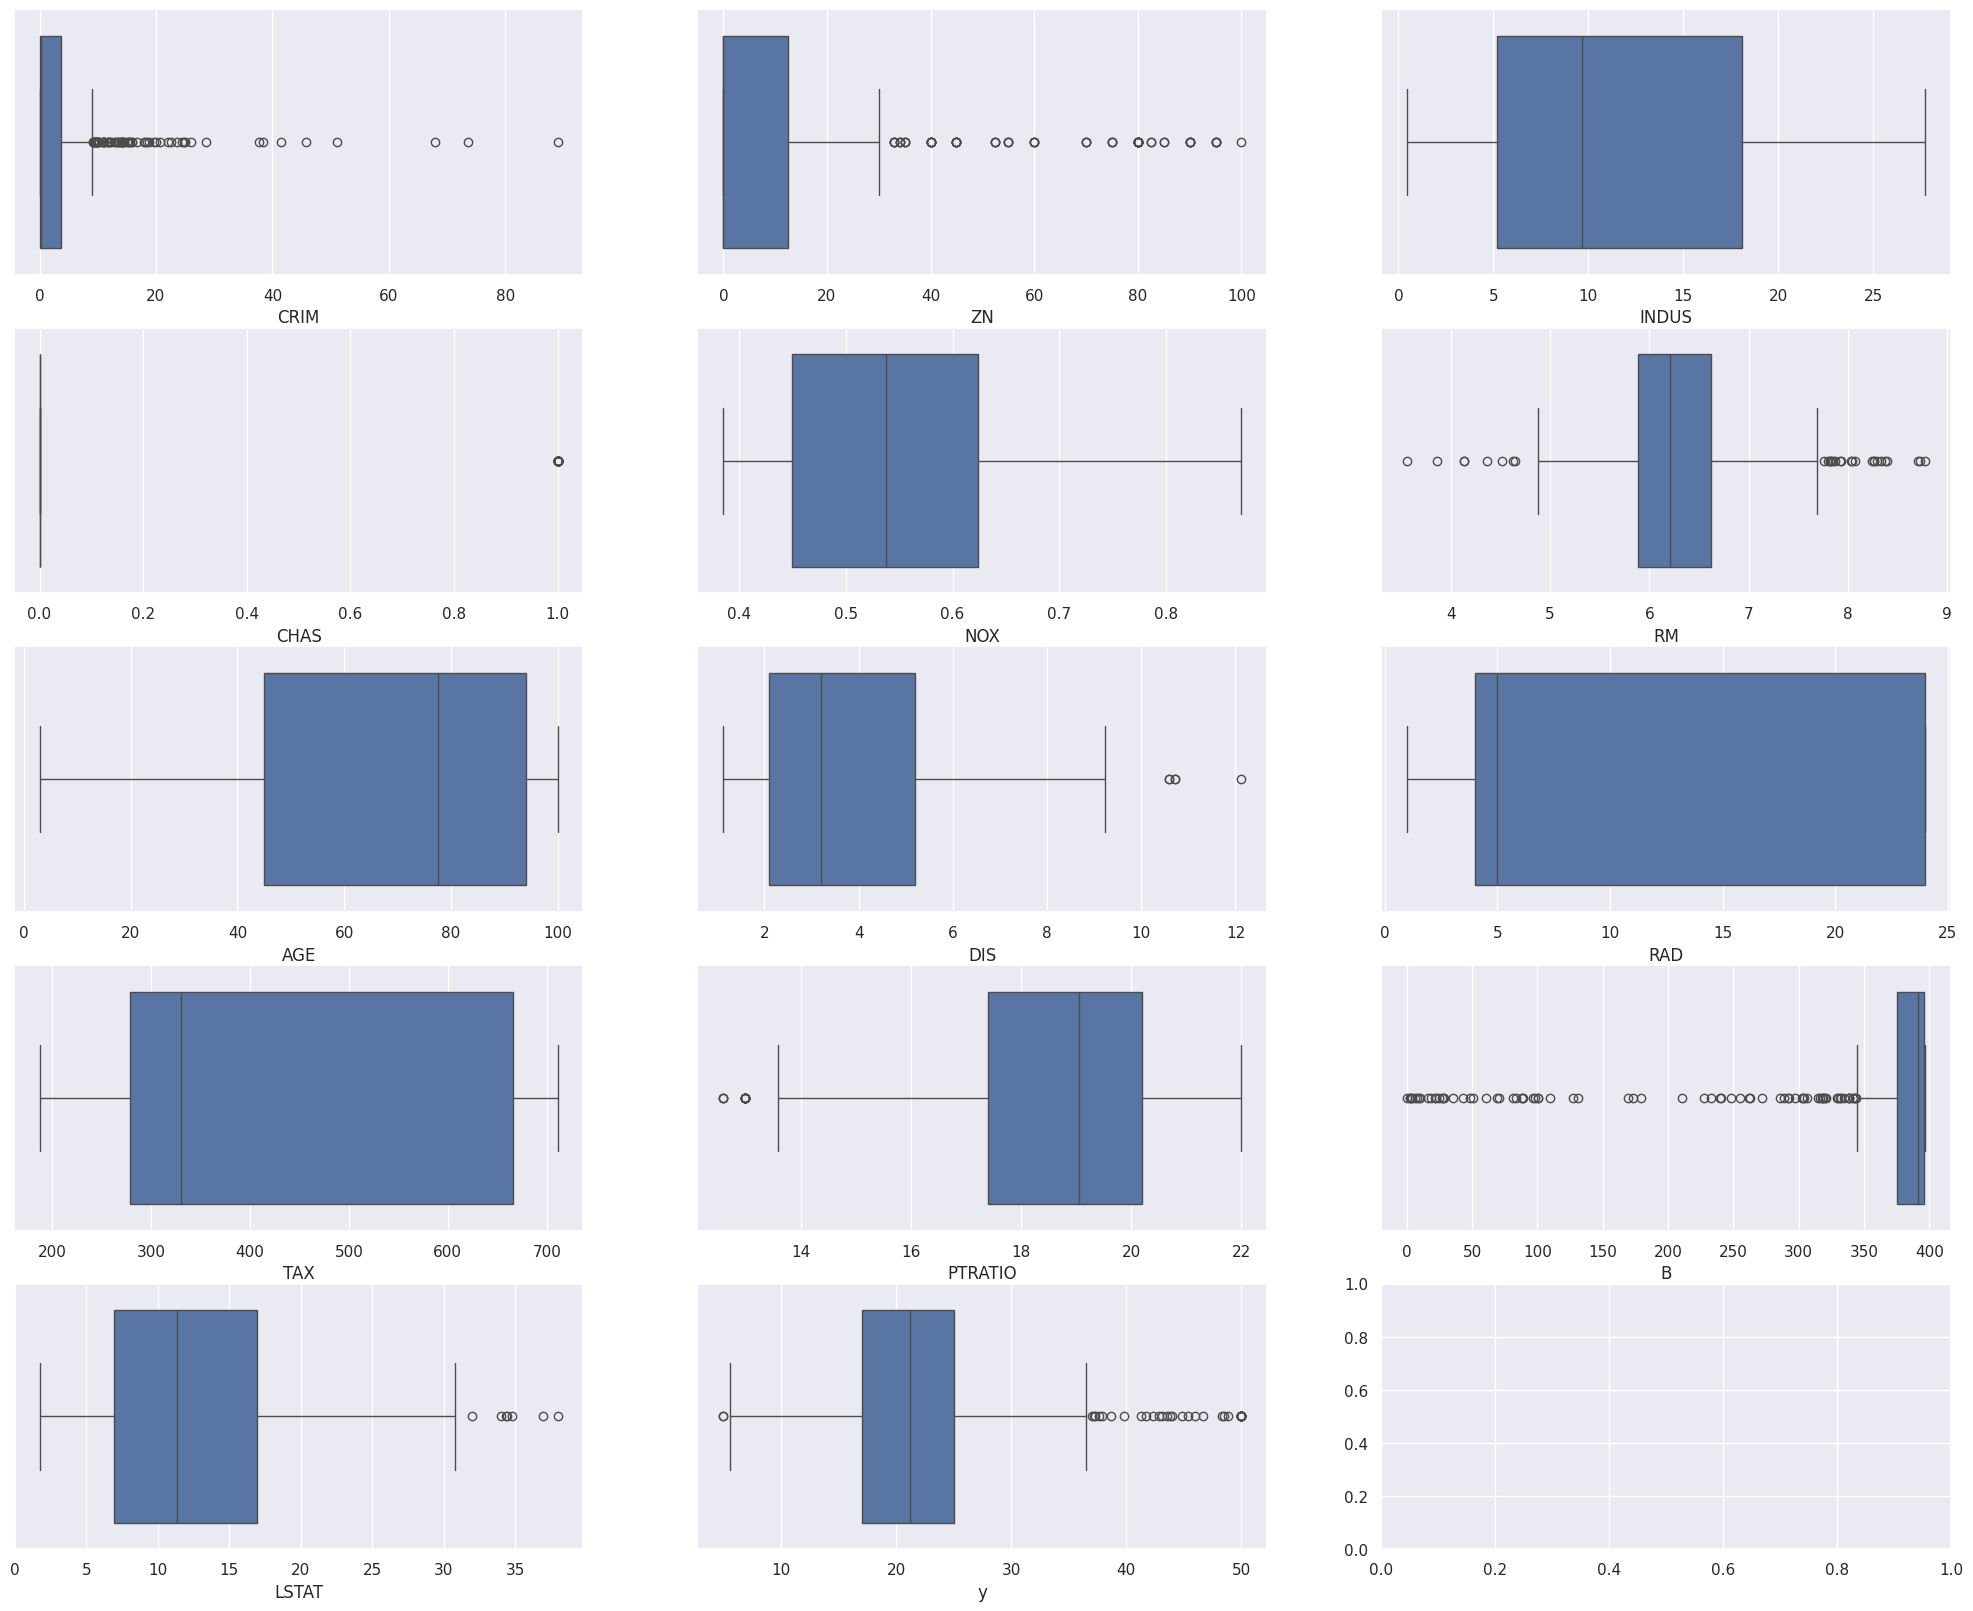

In [6]:
import seaborn as sns
from matplotlib import pyplot as plt

sns.set_theme(font_scale=1)
_, axes = plt.subplots(5, 3, figsize=(25, 20), dpi=100)

col = 0
row = 0
for column in dataset.columns:
    _ = sns.boxplot(x=column, data=dataset, ax=axes[col, row])
    col, row = (col+1, 0) if row >= 2 else (col, row+1)

In [7]:
dataset.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,y
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


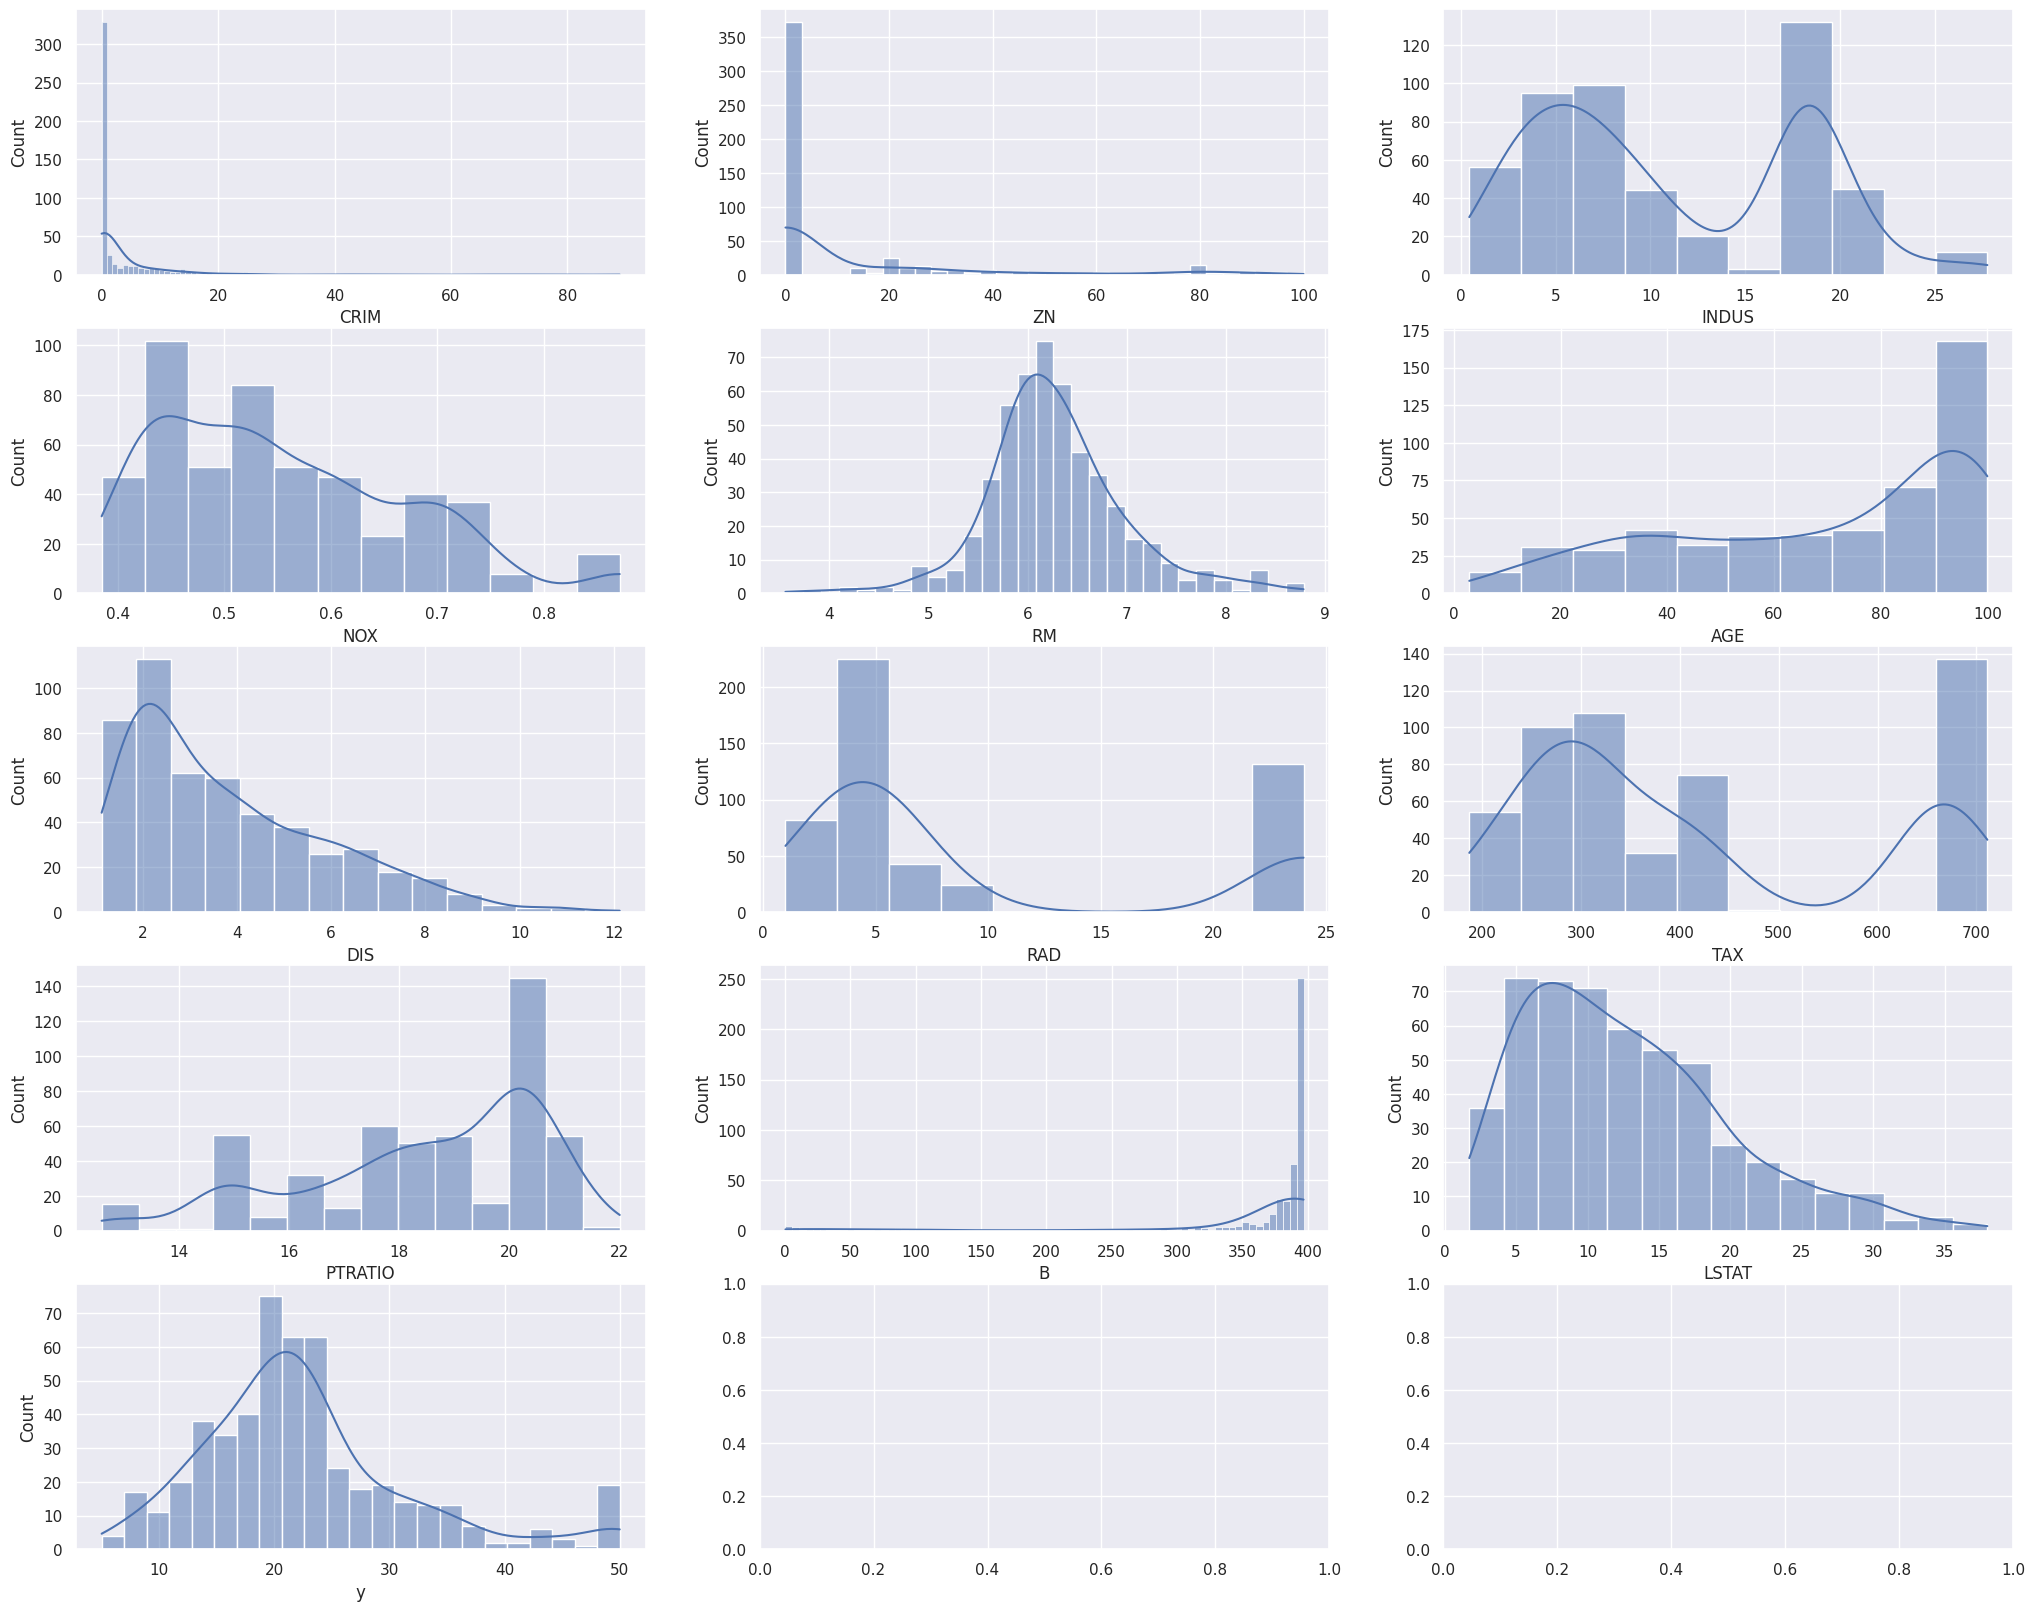

In [8]:
_, axes = plt.subplots(5, 3, figsize=(25, 20), dpi=100)

col = 0
row = 0
for column in dataset.columns:
    if column == "CHAS":
        continue
    _ = sns.histplot(x=column, data=dataset, kde=True, ax=axes[col, row])
    col, row = (col+1, 0) if row >= 2 else (col, row+1)

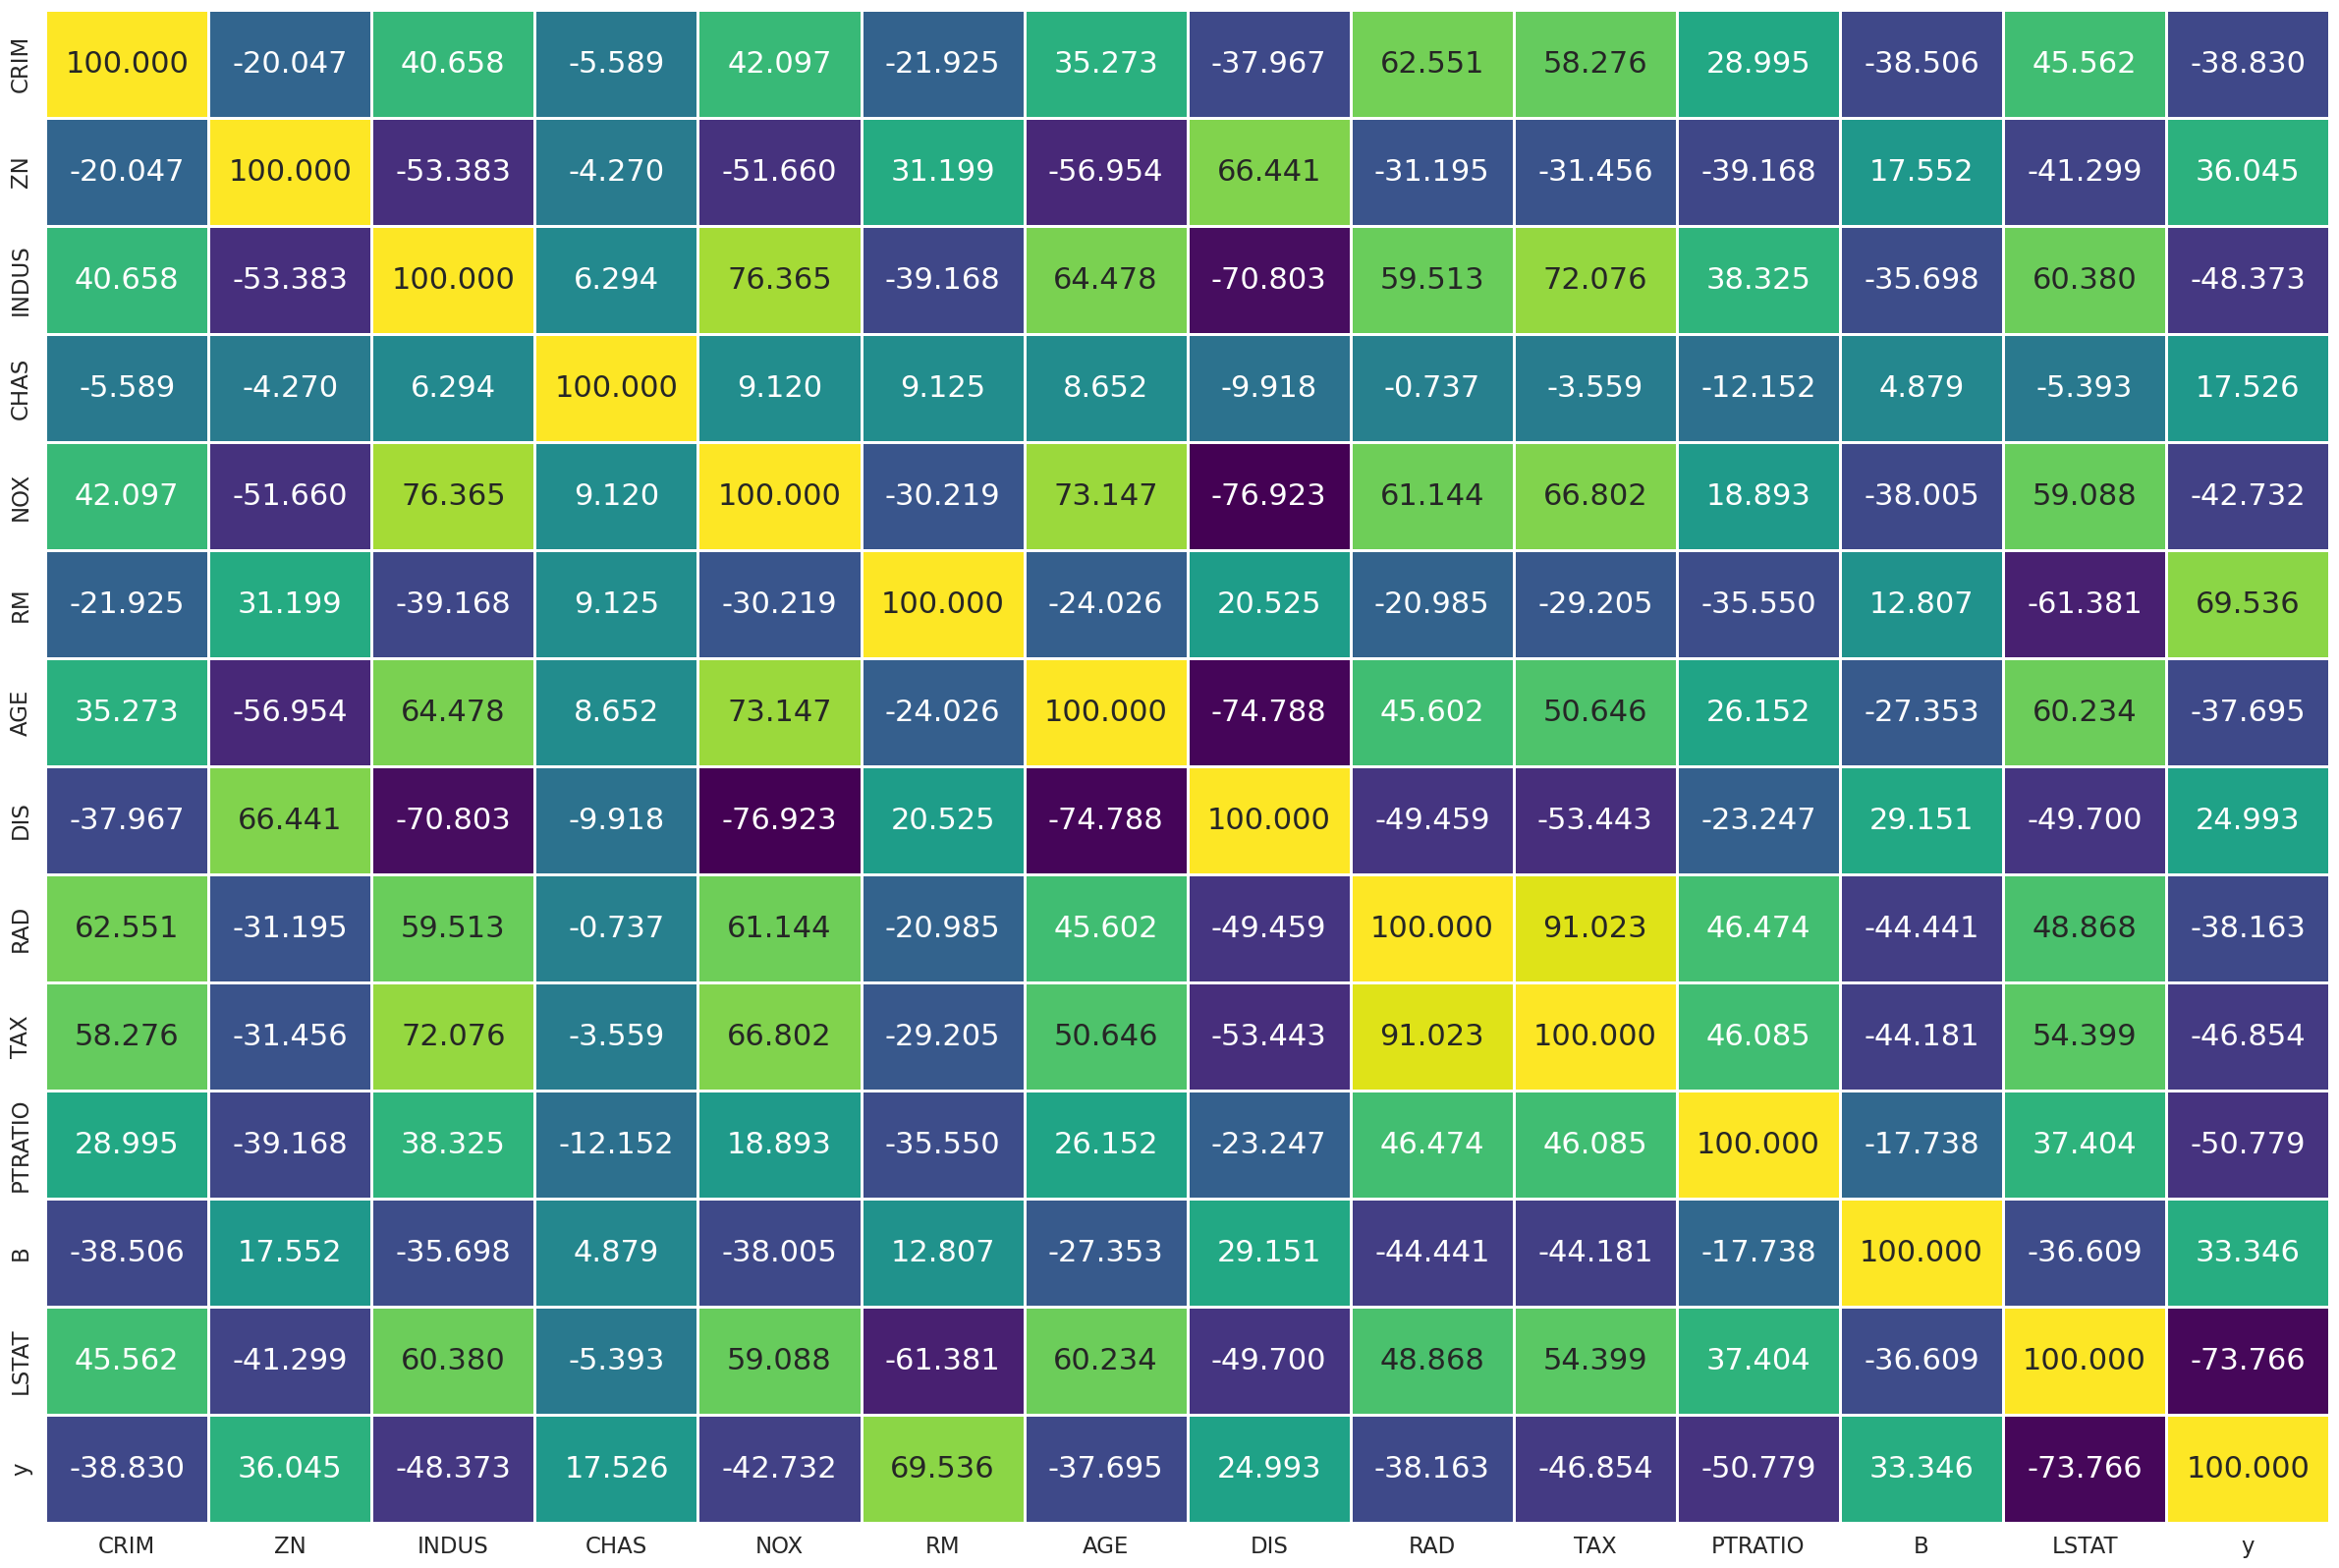

In [9]:
plt.figure(figsize=(30, 20), dpi=100) 
sns.set_theme(font_scale=1.5)

corr_map = dataset.corr() * 100
_ = sns.heatmap(
    corr_map, annot=True, annot_kws={"fontsize": 22}, linecolor="white",
    linewidth=1, fmt=".3f", cmap="viridis", cbar=False
)

In [10]:
from sklearn.model_selection import train_test_split

X = dataset.drop(columns=["y"], axis=1, inplace=False)
y = dataset[["y"]]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=True, random_state=42
)

In [11]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(
    n_estimators=32,
    criterion="poisson",
    max_depth=20, max_features=X_train.shape[1],
    bootstrap=True, oob_score=True, n_jobs=-1,
    random_state=42, verbose=0
)
model.fit(X_train, y_train)

/home/parth/miniconda3/envs/env-practice-ml-py310/lib/python3.10/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(criterion='poisson', max_depth=20, max_features=13,
                      n_estimators=32, n_jobs=-1, oob_score=True,
                      random_state=42)

In [12]:
model.score(X_test, y_test)

0.9159734292282855

In [13]:
from sklearn.metrics import r2_score

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_r2 = r2_score(y_train, y_train_pred)
print(f"Train R2 Score: {train_r2}")

test_r2 = r2_score(y_test, y_test_pred)
print(f"Test R2 Score: {test_r2}")

Train R2 Score: 0.9770240851658509
Test R2 Score: 0.9159734292282855


In [19]:
def adjusted_r2(r2, n, p):
    return 1 - (((1 - r2) * (n - 1)) / (n - p - 1))

train_adj_r2 = adjusted_r2(train_r2, len(y_train), X_train.shape[1])
print(f"Train Adjusted R2 Score: {train_adj_r2}")

test_adj_r2 = adjusted_r2(test_r2, len(y_test), X_test.shape[1])
print(f"Test Adjusted R2 Score: {test_adj_r2}")

Train Adjusted R2 Score: 0.976258221338046
Test Adjusted R2 Score: 0.903560413091555


In [15]:
import numpy as np
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_test_pred)
print(f"Test Mean Squared Error: {mse}")

r_mse = np.sqrt(mse)
print(f"Test Root Mean Squared Error: {r_mse}")

Test Mean Squared Error: 6.161986320678445
Test Root Mean Squared Error: 2.482334852649506
